# Handwriting Recognition using K-Means clustering
##### Roger Qiu - 6/17/2022
### Introduction
Unsupervised Learning is how we find patterns and structure in unlabeled data. Clustering is the most well-known unsupervised learning technique. It finds structure in unlabeled data by identifying similar groups, or clusters. The goal of clustering is to separate data so that data similar to one another are in the same group, while data different from one another are in different groups. So two questions arise:
- How many groups do we choose?
- How do we define similarity?

k-means is the most popular and well-known clustering algorithm, and it tries to address these two questions.
- The “k” refers to the number of clusters (groups) we expect to find in a dataset.
- The “Means” refers to the average distance of data to each cluster center, also known as the centroid, which we are trying to minimize.

In this project, we will use K-means clustering and scikit-learn to cluster images of handwritten digits. By clustering all the images along with their associated digit, we will train our model to predict handwriting of digits. We will finally test this model by creating our own image and having the model predict the digit.

### The Data
To begin, let's load and inspect our data from the digits database from the sklearn library. Let's inspect the database description, the data we're given and how it is formatted.

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

<Figure size 432x288 with 0 Axes>

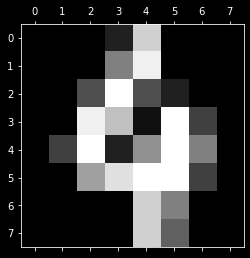

 digits for this picture are :
[[ 0.  0.  0.  2. 13.  0.  0.  0.]
 [ 0.  0.  0.  8. 15.  0.  0.  0.]
 [ 0.  0.  5. 16.  5.  2.  0.  0.]
 [ 0.  0. 15. 12.  1. 16.  4.  0.]
 [ 0.  4. 16.  2.  9. 16.  8.  0.]
 [ 0.  0. 10. 14. 16. 16.  4.  0.]
 [ 0.  0.  0.  0. 13.  8.  0.  0.]
 [ 0.  0.  0.  0. 13.  6.  0.  0.]]
 The number is :
4


In [17]:
# load libraries
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

# give us a dataset of hand written digits
digits = datasets.load_digits()

# open description of digits
print(digits.DESCR)
# :Number of Instances: 1797
# :Number of Attributes: 64
# :Attribute Information: 8x8 image of integer pixels in the range 0..16.
# 0 is white pixel, 16 is black

print("data is: ")
print(digits.data)
# list of arrays that is the data

print("target is :")
print(digits.target)
# list of actual digits which each array is supposed to represent

# visualize one of the digits using matshow which displays an array as matrix using a 2d array
# lets print the 100th data set
plt.gray()
plt.matshow(digits.images[100])
plt.show()
# appears to be a picture of the number 4

# prints the digits of image 100
print(" digits for this picture are :")
print(digits.images[100])
# larger numbers seem to be lighter areas on the image

# prints the number of image 100
print(" The number is :")
print(digits.target[100])
# image 100 is in fact a picture of the number 4



### Creating the K-Means model
Now that we have and understand our data, lets fit it into a k-means model and display each digit from the average clustered centers.

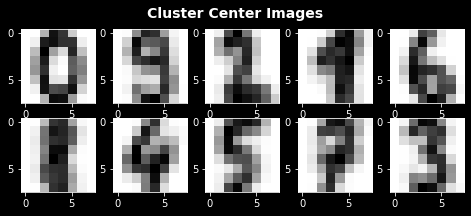

In [18]:
# 10 different digits here (0 to 9) means there should be 10 different clusters, so k (num_clusters) is 10
# The random_state will ensure that every time you run your code, the model is built in the same way. This can be any number.
model = KMeans(n_clusters=10, random_state=42)

# fit data of all the arrays to model to form clusters
model.fit(digits.data)

# start creating a multi chart to visualize centroids or how these arrays are clustered, start by adding a figure of size 8x3
fig = plt.figure(figsize=(8,3))

# style the visual
fig.suptitle("Cluster Center Images", fontsize=14, fontweight="bold")

# for loop to display each of the cluster centers
for i in range(10):
 
  # Initialize subplots in a grid of 2X5, at i+1th position
  ax = fig.add_subplot(2, 5, 1 + i)
 
  # Display each image of the model at i location, reshaped and using a colormap setup
  ax.imshow(model.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

plt.show()
# appears to be the images of the number 0 to 9

### Testing the model
Finally let's test the model we built, let's write our own 4 numbers and use the array to input into the model and see what the model thinks we wrote. We can acquire the array for 4 numbers written on this website: https://www.codecademy.com/paths/machine-learning-fundamentals/tracks/mle-unsupervised-learning-algorithms-i/modules/mle-k-means-clustering/projects/clustering. Then in right panel: http://localhost:8000/test.html.Before we can find our results, since the clustered images are not indexed in order as we can see from above we will need to use for loop to match clustered handwriting images and their numbers with correct index.


In [19]:
# write 4 digits and click get array, I used 1996
# prints out array that has digits data

# (1996):
# pass data as new samples into kmeans algorithm
new_sample = np.array([
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.79,4.33,0.00,0.00,0.00,0.00,0.00,0.30,6.32,7.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.61,0.00,0.00,0.00,0.00,0.00,0.00,0.38,7.46,0.00,0.00,0.00,0.00,0.00,0.00,0.76,6.85,0.00,0.00,0.00,0.00,0.00,0.00,0.23,3.58,0.00,0.00,0.00],
[0.00,3.57,7.16,7.61,3.95,0.00,0.00,0.00,2.80,6.70,1.06,1.13,7.07,0.68,0.00,0.00,4.57,3.12,0.00,0.00,5.93,2.28,0.00,0.00,3.95,5.79,3.73,2.59,7.08,2.12,0.00,0.00,0.37,2.81,3.95,5.03,7.39,0.76,0.00,0.00,0.00,0.00,0.00,0.00,6.85,0.76,0.00,0.00,0.00,0.76,4.71,0.22,7.16,0.53,0.00,0.00,0.00,0.15,5.47,5.61,7.16,0.00,0.00,0.00],
[0.00,0.45,5.78,7.39,5.63,0.60,0.00,0.00,0.00,3.80,4.94,0.60,4.87,4.71,0.00,0.00,0.00,5.25,2.43,0.08,2.64,7.46,0.00,0.00,0.00,3.72,7.39,7.62,6.78,7.62,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.62,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.61,0.00,0.00,0.00,3.27,0.98,0.00,2.80,6.92,0.00,0.00,0.00,4.16,6.23,5.62,6.69,1.81,0.00,0.00],
[0.00,0.00,2.26,7.23,2.20,0.00,0.00,0.00,0.00,0.00,6.55,2.12,0.00,0.00,0.00,0.00,0.00,0.98,7.62,3.88,0.75,0.00,0.00,0.00,0.00,1.75,6.55,4.63,6.61,0.30,0.00,0.00,0.00,2.28,5.33,0.00,5.86,2.21,0.00,0.00,0.00,2.28,5.93,0.00,5.33,2.28,0.00,0.00,0.00,0.37,6.31,4.55,6.09,1.90,0.00,0.00,0.00,0.00,0.74,4.57,5.93,0.53,0.00,0.00]
])

# use predict function to predict new labels for 4 digits given our 4 samples
new_labels = model.predict(new_samples)

print("new labels: ")
print(new_labels)

# we have 3717 but from the earlier picture of all images, it seems that:
# Index 0 looks like 0
# Index 1 looks like 9
# Index 2 looks like 2
# Index 3 looks like 1
# Index 4 looks like 6
# Index 5 looks like 8
# Index 6 looks like 4
# Index 7 looks like 5
# Index 8 looks like 7
# Index 9 looks like 3

# for each number from 0 to 4: 
# if the predicted new label is this number, print the corrected number out, and move to next number
# print(x, end='') so that all the digits are printed on the same line.
print(" Is your number?: ")

for i in range(len(new_labels)):
  if new_labels[i] == 0:
    print(0, end='')
  elif new_labels[i] == 1:
    print(9, end='')
  elif new_labels[i] == 2:
    print(2, end='')
  elif new_labels[i] == 3:
    print(1, end='')
  elif new_labels[i] == 4:
    print(6, end='')
  elif new_labels[i] == 5:
    print(8, end='')
  elif new_labels[i] == 6:
    print(4, end='')
  elif new_labels[i] == 7:
    print(5, end='')
  elif new_labels[i] == 8:
    print(7, end='')
  elif new_labels[i] == 9:
    print(3, end='')

new labels: 
[3 7 1 7]
 Is your number?: 
1595

### Conclusion
The number from the model was 1595, you can see that this is visually close to 1996 but my handwriting needs to match the inputted handwriting more. In this project, we were able use K-means clustering and scikit-learn to cluster images of handwritten digits and created our own image array and having the model predict the digit.